## Remove cancer type experiments

In our previous experiments, we were comparing pancancer mutation prediction (train a model on all cancer types, then test on a single cancer type) with single-cancer mutation prediction (train and test on the same single cancer type).

Here, we want to find out what happens to performance when we remove the relevant cancer type from the pancancer training set (i.e. train on all cancer types minus the one we test on). We plan to compare this with the pancancer results, under the assumption that this should be detrimental to performance.

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
single_cancer_dir = os.path.join(cfg.results_dir, 'single_cancer')
pancancer_dir = os.path.join(cfg.results_dir, 'pancancer')
remove_cancer_dir = os.path.join(cfg.results_dir, 'pancancer_only')

In [3]:
single_cancer_df = au.load_prediction_results(single_cancer_dir, 'single_cancer')
print(single_cancer_df.shape)
single_cancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99987,0.99879,MAP3K1,BRCA,signal,42,train,0,single_cancer,MAP3K1_BRCA
1,0.72689,0.46638,MAP3K1,BRCA,signal,42,test,0,single_cancer,MAP3K1_BRCA
2,0.72844,0.38910,MAP3K1,BRCA,signal,42,cv,0,single_cancer,MAP3K1_BRCA
3,0.99860,0.98630,MAP3K1,BRCA,signal,42,train,1,single_cancer,MAP3K1_BRCA
4,0.74887,0.48700,MAP3K1,BRCA,signal,42,test,1,single_cancer,MAP3K1_BRCA


In [4]:
pancancer_df = au.load_prediction_results(pancancer_dir, 'pancancer')
print(pancancer_df.shape)
pancancer_df.head()

(9732, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.95820,0.68399,MAP3K1,BRCA,signal,42,train,0,pancancer,MAP3K1_BRCA
1,0.69619,0.40796,MAP3K1,BRCA,signal,42,test,0,pancancer,MAP3K1_BRCA
2,0.62527,0.20878,MAP3K1,BRCA,signal,42,cv,0,pancancer,MAP3K1_BRCA
3,0.98367,0.82884,MAP3K1,BRCA,signal,42,train,1,pancancer,MAP3K1_BRCA
4,0.77170,0.44885,MAP3K1,BRCA,signal,42,test,1,pancancer,MAP3K1_BRCA


In [5]:
remove_cancer_df = au.load_prediction_results(remove_cancer_dir, 'pancancer_only')
print(remove_cancer_df.shape)
remove_cancer_df.head()

(10464, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99985,0.99861,MAP3K1,BRCA,signal,42,train,0,pancancer_only,MAP3K1_BRCA
1,0.71789,0.47920,MAP3K1,BRCA,signal,42,test,0,pancancer_only,MAP3K1_BRCA
2,0.72623,0.39968,MAP3K1,BRCA,signal,42,cv,0,pancancer_only,MAP3K1_BRCA
3,0.99901,0.99020,MAP3K1,BRCA,signal,42,train,1,pancancer_only,MAP3K1_BRCA
4,0.74763,0.49074,MAP3K1,BRCA,signal,42,test,1,pancancer_only,MAP3K1_BRCA


In [6]:
experiment_comparison_df = au.compare_results(single_cancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=False,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head(n=15)

,identifier,delta_mean,p_value
107,SF3B1_BLCA,0.012064,0.083391
280,NF1_BLCA,0.027200,0.114845
4,STAG2_UCEC,-0.318292,0.214902
427,BCOR_LUAD,-0.012609,0.280791
350,EGFR_STAD,-0.141367,0.305119
281,CASP8_UCEC,-0.008374,0.321370
155,TSHR_UCEC,0.024031,0.341043
167,HNF1A_UCEC,0.117803,0.357306
103,PIK3CA_BLCA,-0.029052,0.358829
198,PTEN_COAD,0.042227,0.364512


Text(0.5, 1.0, 'Comparison of pan-cancer and single-cancer results, Vogelstein genes')

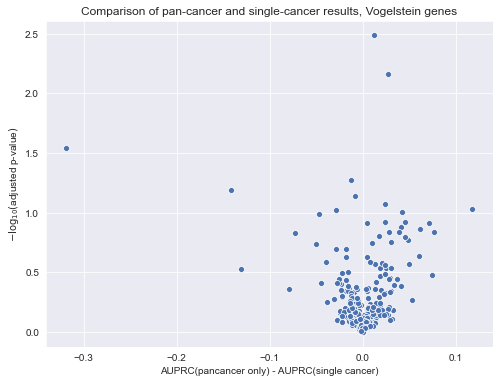

In [7]:
experiment_comparison_df['nlog10_p'] = -np.log(experiment_comparison_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=experiment_comparison_df, x='delta_mean', y='nlog10_p')
plt.xlabel('AUPRC(pancancer only) - AUPRC(single cancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of pan-cancer and single-cancer results, Vogelstein genes')

In [11]:
experiment_comparison_df = au.compare_results(pancancer_df,
                                              pancancer_df=remove_cancer_df,
                                              identifier='identifier',
                                              metric='aupr',
                                              correction=False,
                                              verbose=False)
experiment_comparison_df.sort_values(by='p_value').head(n=25)

,identifier,delta_mean,p_value
403,BRAF_SKCM,0.258680,0.000588
420,PTEN_BLCA,-0.224705,0.000610
208,NF1_UCEC,-0.305060,0.000732
15,NF1_SARC,-0.480423,0.002015
383,SMAD4_HNSC,-0.327763,0.002369
35,JAK2_UCEC,-0.424548,0.002681
297,SMAD4_CESC,-0.606137,0.003134
149,SPOP_PRAD,0.423745,0.003392
24,PTEN_STAD,-0.270193,0.008031
89,PIK3CA_UCEC,-0.084020,0.009122


In [12]:
results_dir = '/home/jake/data/pancancer_vogelstein_09_25'
pancancer_comparison_df = pd.read_csv(os.path.join(results_dir, 'pancancer_pvals.tsv'),
                                      index_col=False, sep='\t')
overlap = experiment_comparison_df.index.intersection(pancancer_comparison_df.index)
experiment_sig_df = (
    experiment_comparison_df.reindex(overlap)
                            .assign(reject_shuffled_null=pancancer_comparison_df.reject_null)
)
experiment_sig_df.sort_values(by='p_value').head(n=15)

,identifier,delta_mean,p_value,reject_shuffled_null
208,NF1_UCEC,-0.305060,0.000732,True
15,NF1_SARC,-0.480423,0.002015,True
383,SMAD4_HNSC,-0.327763,0.002369,False
35,JAK2_UCEC,-0.424548,0.002681,False
297,SMAD4_CESC,-0.606137,0.003134,True
149,SPOP_PRAD,0.423745,0.003392,True
24,PTEN_STAD,-0.270193,0.008031,False
89,PIK3CA_UCEC,-0.084020,0.009122,False
338,FBXW7_CESC,-0.266079,0.010974,False
222,ARID1A_STAD,-0.097040,0.015228,False


Text(0.5, 1.0, 'Comparison of pan-cancer and single-cancer results, Vogelstein genes')

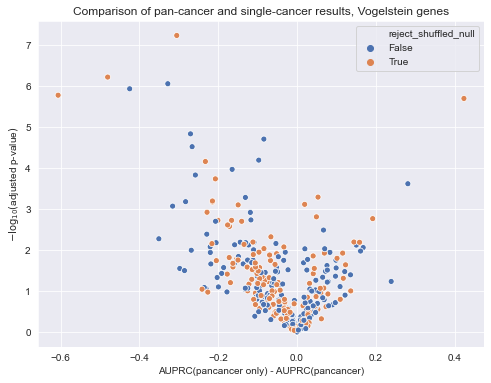

In [13]:
experiment_sig_df['nlog10_p'] = -np.log(experiment_sig_df.p_value)

sns.set({'figure.figsize': (8, 6)})
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p', hue='reject_shuffled_null')
plt.xlabel('AUPRC(pancancer only) - AUPRC(pancancer)')
plt.ylabel(r'$-\log_{10}($adjusted p-value$)$')
plt.title('Comparison of pan-cancer and single-cancer results, Vogelstein genes')

Text(0.5, 1.0, 'Highlight PTEN_GBM in comparison plot')

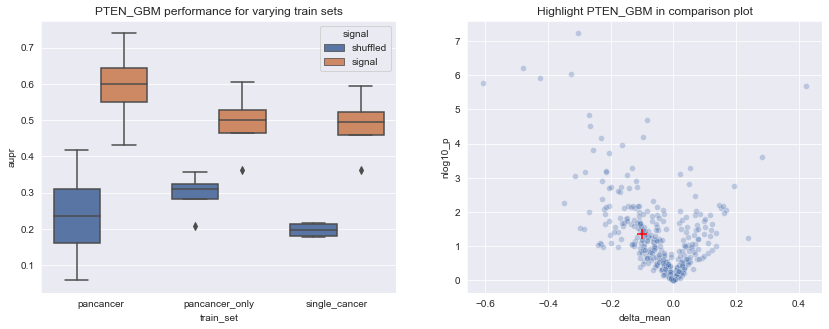

In [49]:
plot_identifier = 'PTEN_GBM'

results_df = pd.concat((
    single_cancer_df, pancancer_df, remove_cancer_df
))
plot_df = results_df[
    (results_df.identifier == plot_identifier) &
    (results_df.data_type == 'test')
].sort_values(by=['signal', 'train_set'])

sns.set({'figure.figsize': (14, 5)})
fig, axarr = plt.subplots(1, 2)
sns.boxplot(data=plot_df, x='train_set', y='aupr', hue='signal', ax=axarr[0])
sns.scatterplot(data=experiment_sig_df, x='delta_mean', y='nlog10_p',
                alpha=0.3, ax=axarr[1])

def highlight_id(x, y, val, ax, id_to_plot):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == id_to_plot:
            ax.scatter(point['x'], point['y'], color='red', marker='+', s=100)
        
highlight_id(experiment_sig_df.delta_mean, experiment_sig_df.nlog10_p,
             experiment_sig_df.identifier, axarr[1], plot_identifier)

axarr[0].set_title('{} performance for varying train sets'.format(plot_identifier))
axarr[1].set_title('Highlight {} in comparison plot'.format(plot_identifier))